In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
#import seaborn as seabornInstance
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')
#from scipy.interpolate import CubicSpline
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn import metrics

In [2]:
dataset = pd.read_csv("co2emission.csv")
dataset

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


In [3]:
new_data = dataset[["country", "year", "co2_per_capita"]]
new_data.head()

,country,year,co2_per_capita
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN


In [16]:
europe = new_data[new_data["country"].isin(["Albania","Austria","Andorra","Armenia","Azerbaijan",
                                            "Belarus","Belgium","Bosnia and Herzegovina","Bulgaria",
                                            "Croatia","Cyprus","Czechia",
                                            "Denmark",
                                            "Estonia",
                                            "Finland","France",
                                            "Georgia","Germany","Greece",
                                            "Hungary",
                                            "Iceland","Ireland","Italy",
                                            "Kazakhstan","Kosovo",
                                            "Latvia","Liechtenstein","Lithuania","Luxembourg",
                                            "Malta","Moldova","Montenegro",
                                            "Netherlands","North Macedonia","Norway",
                                            "Poland","Portugal",
                                            "Romania","Russia",
                                            "Serbia","Slovakia","Spain","Sweden","Switzerland",
                                           "Turkey",
                                           "Ukraine", "United Kingdom"])]
europe.head()

,country,year,co2_per_capita
788,Albania,1850,NaN
789,Albania,1851,NaN
790,Albania,1852,NaN
791,Albania,1853,NaN
792,Albania,1854,NaN


In [5]:
print(europe.isnull())

       country   year  co2_per_capita
788      False  False            True
789      False  False            True
790      False  False            True
791      False  False            True
792      False  False            True
...        ...    ...             ...
47932    False  False           False
47933    False  False           False
47934    False  False           False
47935    False  False           False
47936    False  False           False

[8708 rows x 3 columns]


In [6]:
missing_counts = europe.isnull().sum()
print(missing_counts)

country              0
year                 0
co2_per_capita    1328
dtype: int64


In [7]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 788 to 47936
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         8708 non-null   object 
 1   year            8708 non-null   int64  
 2   co2_per_capita  7380 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.1+ KB


In [8]:
europe_data = europe.loc[(europe["year"] >= 1900)]
europe_data

,country,year,co2_per_capita
838,Albania,1900,NaN
839,Albania,1901,NaN
840,Albania,1902,NaN
841,Albania,1903,NaN
842,Albania,1904,NaN
...,...,...,...
47932,United Kingdom,2017,5.863
47933,United Kingdom,2018,5.716
47934,United Kingdom,2019,5.462
47935,United Kingdom,2020,4.865


In [9]:
grouped = europe_data.groupby(['country'])
mean_values = grouped.mean()
europe_data.loc[:,'co2_per_capita'] = grouped['co2_per_capita'].transform(lambda x: x.fillna(x.mean()))
europe_data

,country,year,co2_per_capita
838,Albania,1900,1.232888
839,Albania,1901,1.232888
840,Albania,1902,1.232888
841,Albania,1903,1.232888
842,Albania,1904,1.232888
...,...,...,...
47932,United Kingdom,2017,5.863000
47933,United Kingdom,2018,5.716000
47934,United Kingdom,2019,5.462000
47935,United Kingdom,2020,4.865000


In [10]:
# Group by 'year' and calculate the mean of 'co2_per_capita' within each year group
mean_by_year = europe_data.groupby('year')['co2_per_capita'].mean()

# Display the first 10 means per year
mean_by_year.head(10)


year
1900    2.395832
1901    2.375619
1902    2.365278
1903    2.400300
1904    2.419300
1905    2.426151
1906    2.514151
1907    2.627321
1908    2.707172
1909    2.663959
Name: co2_per_capita, dtype: float64

In [11]:
# Convert Series to DataFrame
mean_by_year_df = mean_by_year.reset_index()

# Display the DataFrame
mean_by_year_df


,year,co2_per_capita
0,1900,2.395832
1,1901,2.375619
2,1902,2.365278
3,1903,2.400300
4,1904,2.419300
...,...,...
117,2017,6.501851
118,2018,6.448809
119,2019,6.175596
120,2020,5.677936


In [12]:
mean_by_year_df.describe() # mean is above zero, data not white noise

,year,co2_per_capita
count,122.000000,122.000000
mean,1960.500000,5.196092
std,35.362409,2.396453
min,1900.000000,1.753987
25%,1930.250000,2.731186
50%,1960.500000,5.340452
75%,1990.750000,7.416533
max,2021.000000,8.982331


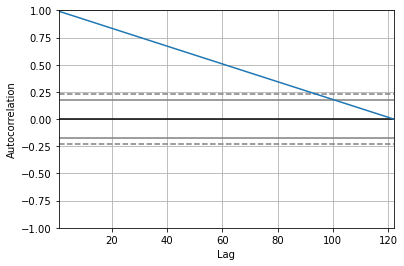

In [14]:
autocorrelation_plot(mean_by_year_df)
pyplot.show()

In [17]:
#testing the value for 'd'
result = adfuller(mean_by_year_df.co2_per_capita.dropna())
print('p-value: ', result[1])

result = adfuller(mean_by_year_df.co2_per_capita.diff().dropna())
print('p-value: ', result[1])

result = adfuller(mean_by_year_df.co2_per_capita.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.6805117240822011
p-value:  4.733511626132159e-13
p-value:  2.720046059703696e-10


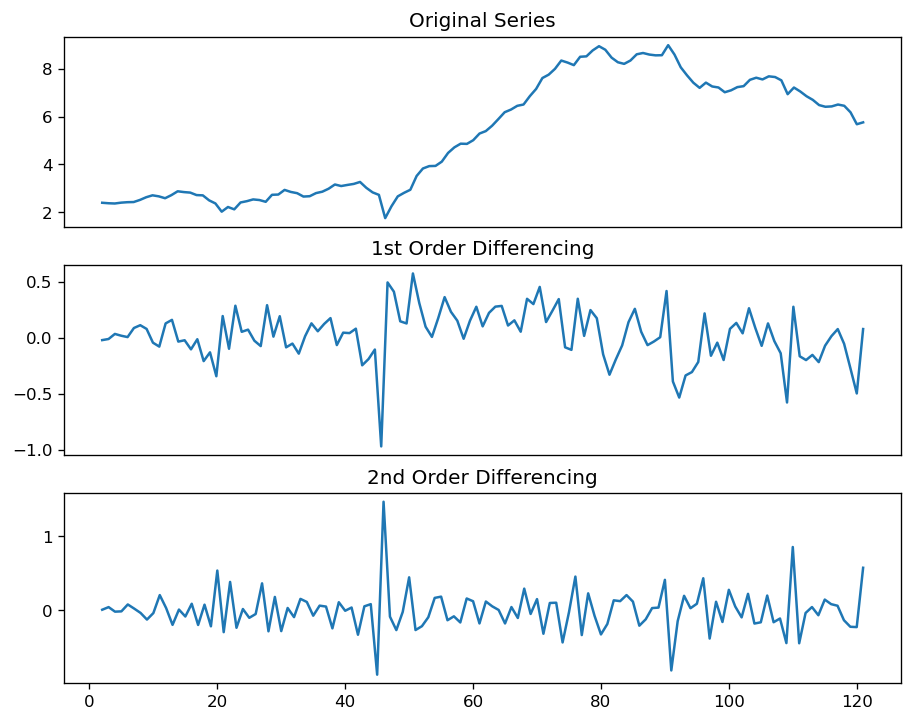

In [18]:
#d=1
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(mean_by_year_df.co2_per_capita); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(mean_by_year_df.co2_per_capita.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(mean_by_year_df.co2_per_capita.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

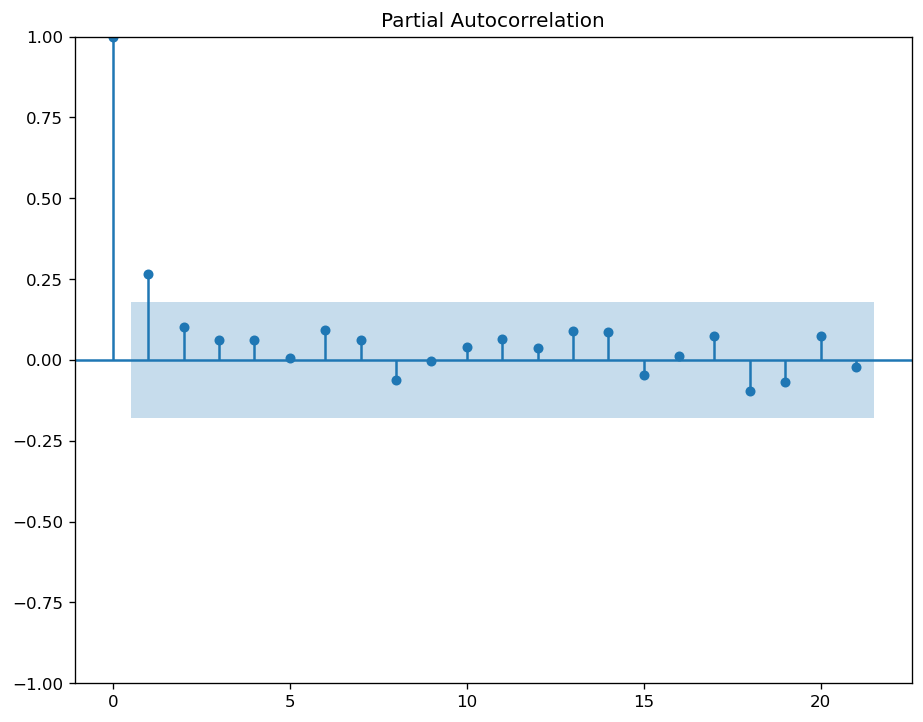

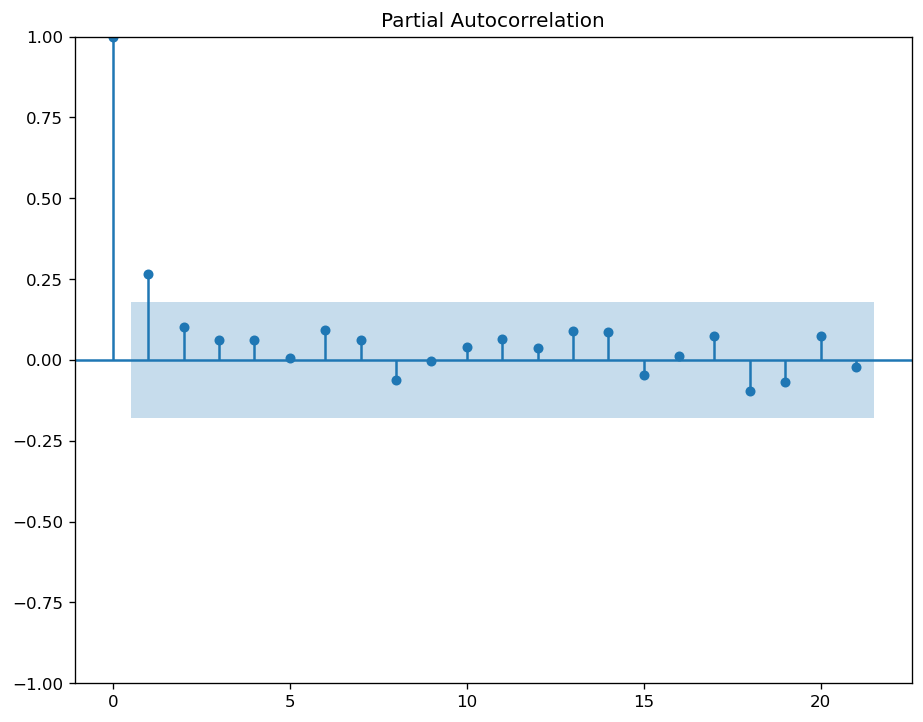

In [19]:
#finding p
from statsmodels.graphics.tsaplots import plot_pacf

#partial autocorrelation
plot_pacf(mean_by_year_df.co2_per_capita.diff().dropna())

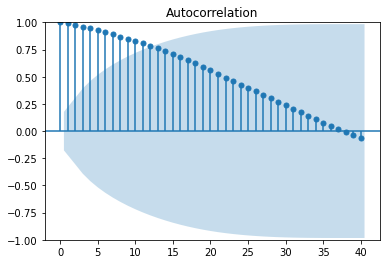

In [20]:
#finding q

plot_acf(mean_by_year_df.co2_per_capita.dropna(), lags = 40)
plt.show()


In [21]:
## d = 1
## p = 1
## q = 1

In [22]:
adftest = adfuller(mean_by_year_df['co2_per_capita'])
print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

ADF Test Results
Null Hypothesis: The series has a unit root (non-stationary)
ADF-Statistic: -1.1838322326020232
P-Value: 0.6805117240822011
Number of lags: 1
Number of observations: 120
Critical Values: {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary


In [23]:
import numpy as np

# Apply logarithmic transformation
#mean_by_year_df['co2_per_capita_logs'] = np.log(mean_by_year_df['co2_per_capita'])

# Calculate first differences
mean_by_year_df["co2_per_capita_diff"] = mean_by_year_df['co2_per_capita'].diff()

# Convert to growth rates (multiply by 100)
#mean_by_year_df['co2_per_capita_growth'] = mean_by_year_df['co2_per_capita_diff'] * 100

# Display the transformed dataset
mean_by_year_df.head(10)


,year,co2_per_capita,co2_per_capita_diff
0,1900,2.395832,NaN
1,1901,2.375619,-0.020213
2,1902,2.365278,-0.010340
3,1903,2.400300,0.035021
4,1904,2.419300,0.019000
5,1905,2.426151,0.006851
6,1906,2.514151,0.088000
7,1907,2.627321,0.113170
8,1908,2.707172,0.079851
9,1909,2.663959,-0.043213


In [24]:
#Differentiation
co2_per_capita_diff = mean_by_year_df['co2_per_capita_diff'].dropna()

# Augmented Dicky-Fuller test
adftest = adfuller(co2_per_capita_diff, autolag='AIC', regression='c')
print("ADF Test Results")
print("Null Hypothesis: The series has an Unit Root")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary")

ADF Test Results
Null Hypothesis: The series has an Unit Root
ADF-Statistic: -8.273149482686362
P-Value: 4.733511626132159e-13
Number of lags: 0
Number of observations: 120
Critical Values {'1%': -3.486055829282407, '5%': -2.8859430324074076, '10%': -2.5797850694444446}
Note: If P-Value is smaller than 0.05, we reject the null Hypothesis and the series is Stationary


In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [36]:
# A nested loop is written to calculate the AIC values
# The lowest AIC the better

aic_values=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(mean_by_year_df['co2_per_capita_diff'], order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aic_values.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
print(aic_values)

[[0, 1, 0, 49.63450890524779], [0, 1, 1, -1.1695394535377872], [0, 1, 2, -0.9340226124768494], [1, 1, 0, 26.373302065446047], [1, 1, 1, -1.0765643000248062], [1, 1, 2, 0.8392925275241705], [2, 1, 0, 18.459333233529144], [2, 1, 1, 0.8396956588011015], [2, 1, 2, 2.811466579496863], [0, 2, 0, 172.2335133103821], [0, 2, 1, 55.543558663800155], [0, 2, 2, 8.817005534740598], [1, 2, 0, 113.48701316920189], [1, 2, 1, 33.21622915680446], [1, 2, 2, 9.210751931210556], [2, 2, 0, 87.40665500837416], [2, 2, 1, 25.868936991873664], [2, 2, 2, 11.157969955506545]]


In [51]:
arima_model = ARIMA(mean_by_year_df.co2_per_capita_diff, order = (2, 1, 1))
model = arima_model.fit()
print(model.summary())

                                SARIMAX Results                                
Dep. Variable:     co2_per_capita_diff   No. Observations:                  122
Model:                  ARIMA(2, 1, 1)   Log Likelihood                   3.580
Date:                 Wed, 01 May 2024   AIC                              0.840
Time:                         19:53:16   BIC                             12.023
Sample:                              0   HQIC                             5.382
                                 - 122                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1481      0.088      1.685      0.092      -0.024       0.320
ar.L2          0.0296      0.100      0.297      0.766      -0.166       0.225
ma.L1         -0.9125      0.062    -14.722 

In [28]:
import itertools

# Define the range of values for p, d, and q
p_range = range(0, 5)  # Example range for p
d_range = range(0, 5)  # Example range for d
q_range = range(0, 5)  # Example range for q

# Create a list of all possible parameter combinations
param_grid = list(itertools.product(p_range, d_range, q_range))

# Define a function to fit ARIMA models and calculate AIC
def fit_arima_and_calc_aic(data, order):
    model = ARIMA(data, order=order)
    try:
        fitted_model = model.fit()
        return fitted_model.aic
    except:
        return np.nan  # Handle cases where the model fitting fails

# Calculate AIC for all parameter combinations
aic_values = []
for param in param_grid:
    p, d, q = param
    aic = fit_arima_and_calc_aic(mean_by_year_df.co2_per_capita_diff, order=(p, d, q))
    aic_values.append((p, d, q, aic))

# Convert results to DataFrame for easier manipulation
aic_df = pd.DataFrame(aic_values, columns=['p', 'd', 'q', 'AIC'])

# Find the parameters corresponding to the lowest AIC
best_params = aic_df.loc[aic_df['AIC'].idxmin()]

print("Best Parameters (p, d, q):", (best_params['p'], best_params['d'], best_params['q']))
print("Lowest AIC:", best_params['AIC'])

Best Parameters (p, d, q): (1.0, 0.0, 1.0)
Lowest AIC: -18.447345519203992


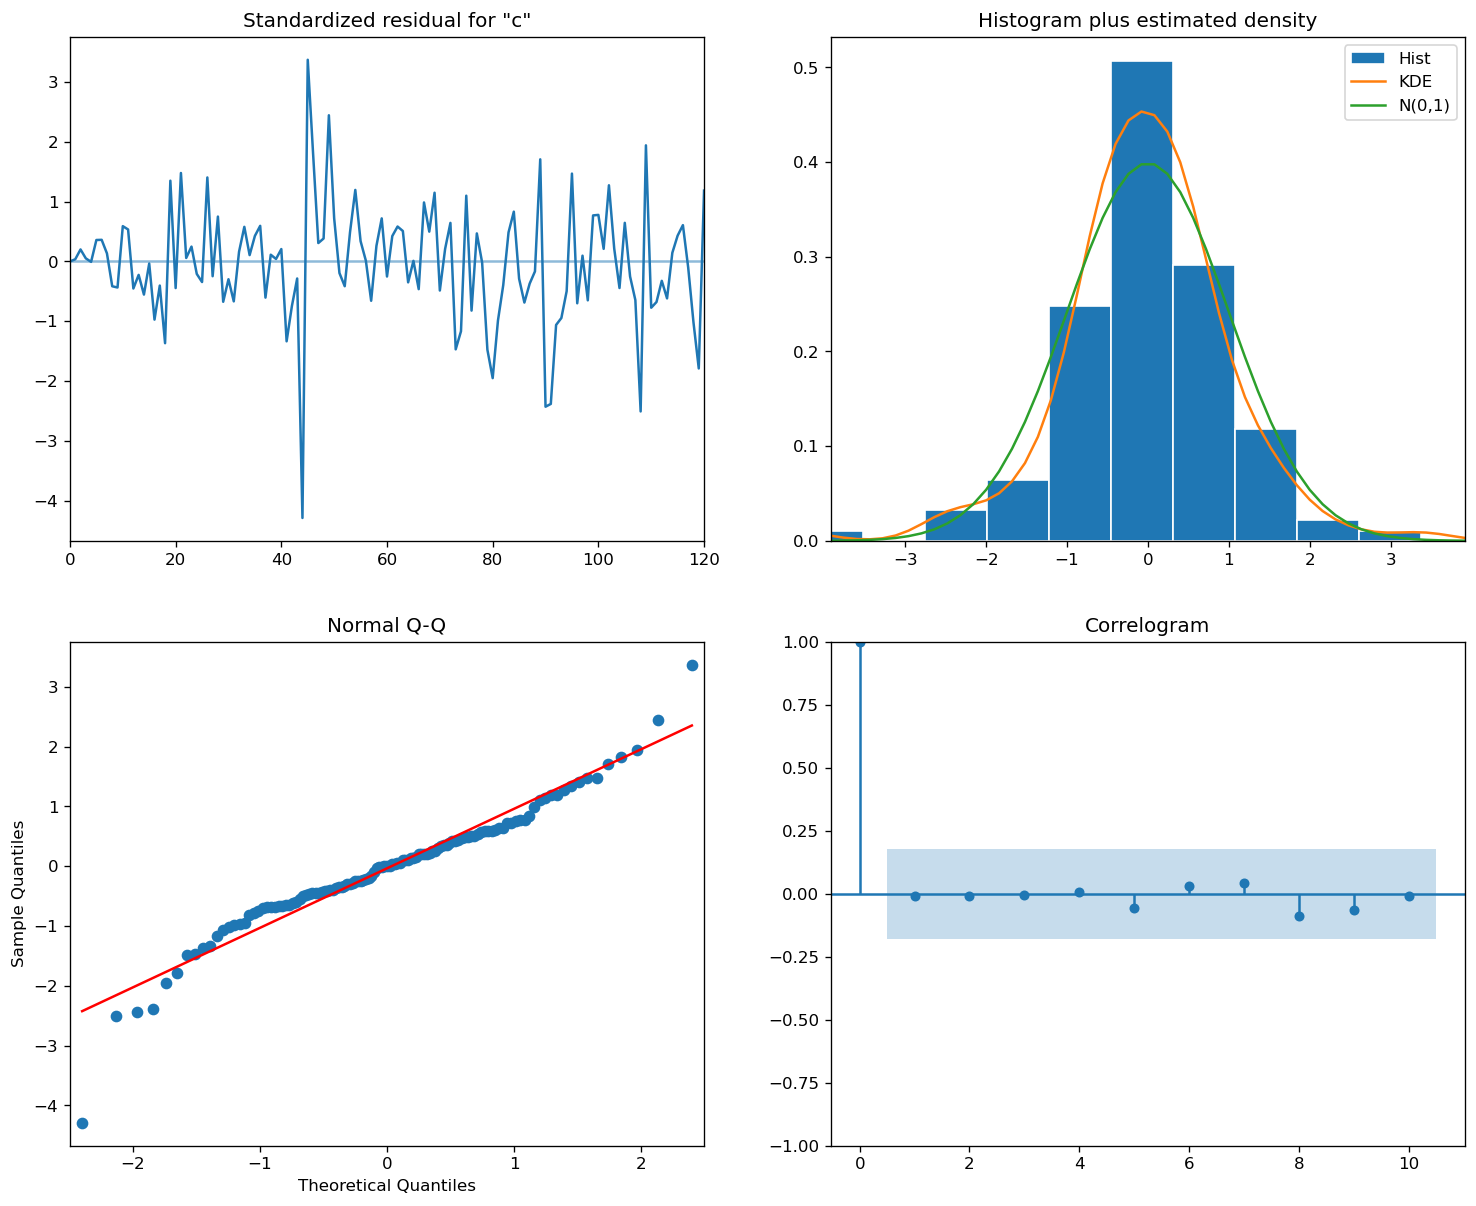

In [54]:
# Diagnosing the model residuals
model.plot_diagnostics(figsize = (15, 12))
plt.show()

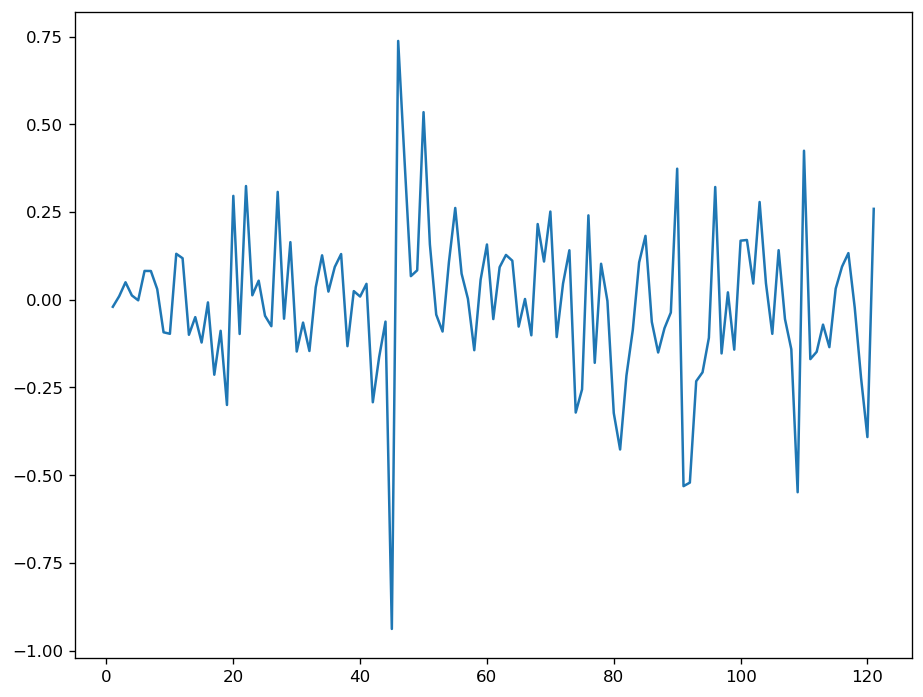

In [55]:
# line plot of residuals
residuals = pd.Series(model.resid)
residuals.plot()
pyplot.show();

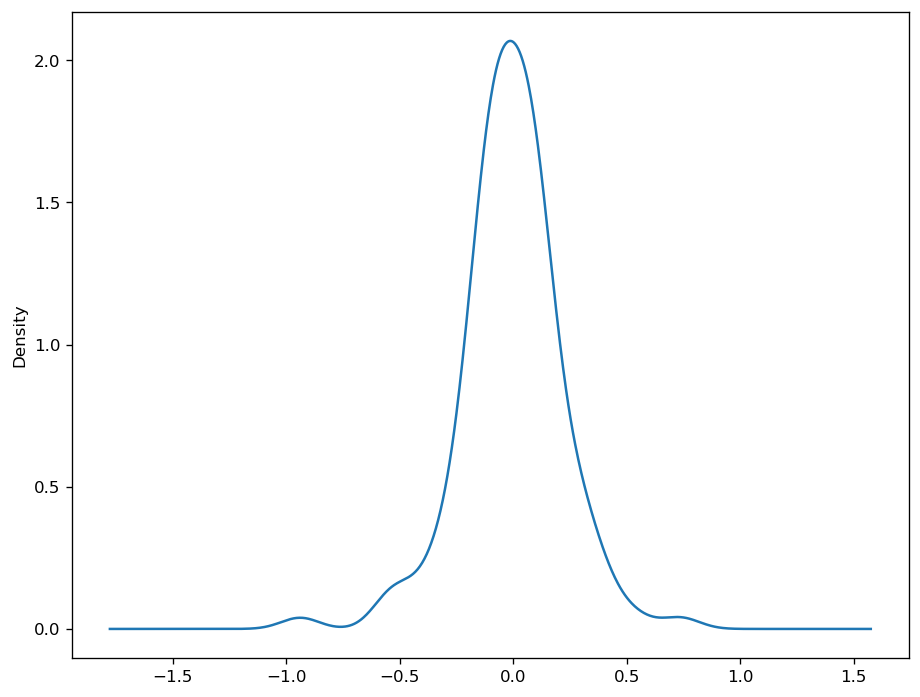

In [56]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

In [40]:
# summary stats of residuals
print(residuals.describe())

count    121.000000
mean      -0.007798
std        0.218666
min       -0.938285
25%       -0.108668
50%        0.002041
75%        0.108810
max        0.737468
dtype: float64


In [41]:
#train the model on the data and perform a forecast
forecast = model.get_forecast(steps = 10)

<Axes: >

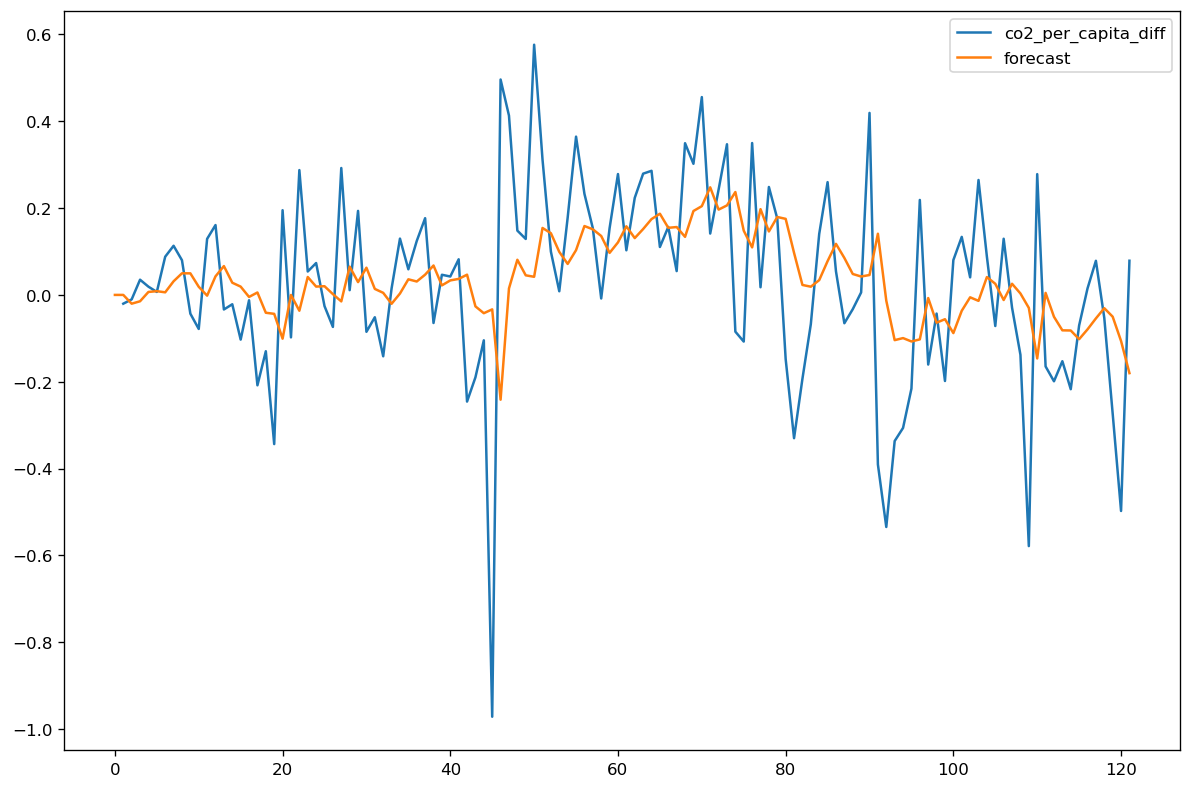

In [42]:
mean_by_year_df['forecast']=model.predict(dynamic=False)
mean_by_year_df[['co2_per_capita_diff','forecast']].plot(figsize=(12,8))

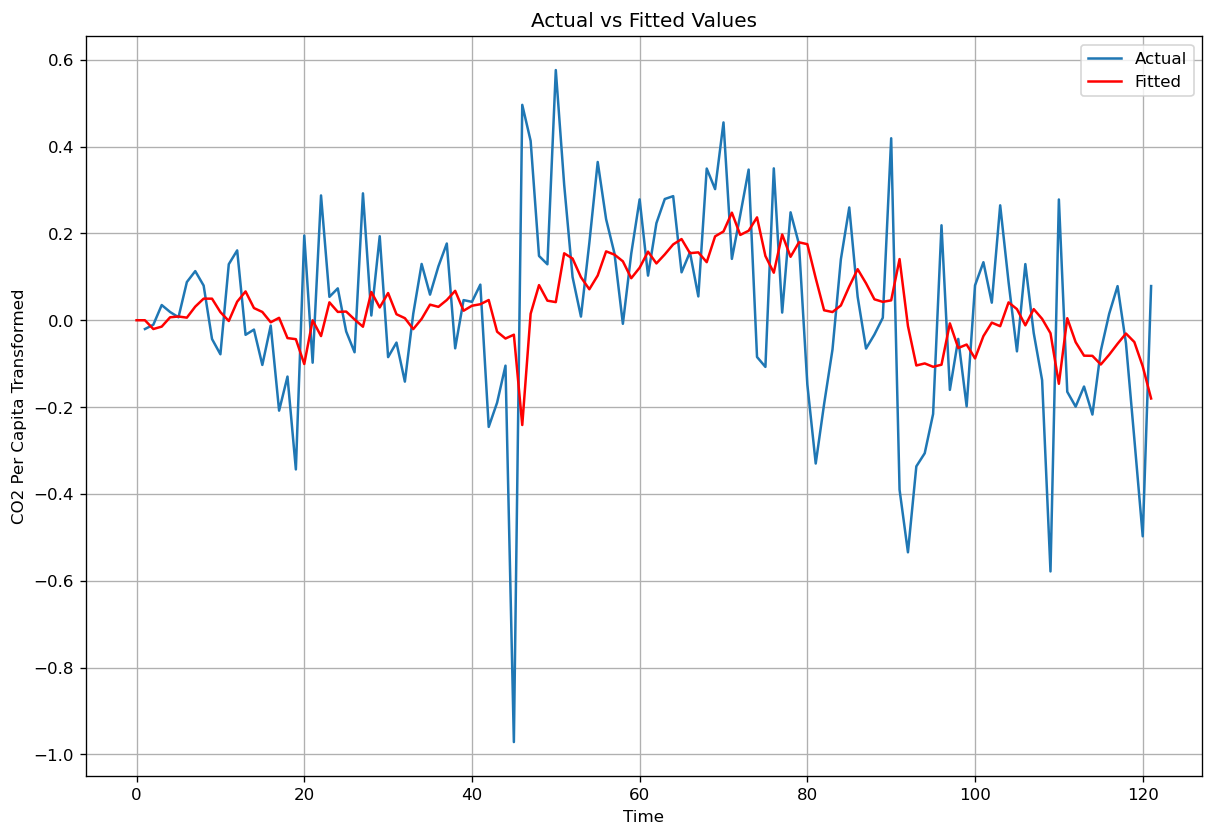

In [43]:
# Plot actual vs fitted values
plt.figure(figsize=(12, 8))
plt.plot(mean_by_year_df.co2_per_capita_diff, label='Actual')
plt.plot(model.fittedvalues, color='red', label='Fitted')
plt.title('Actual vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('CO2 Per Capita Transformed')
plt.legend()
plt.grid(True)
plt.show()